In [ ]:
################## STEP1: EDA ######################

In [1]:
#Importing IMDB dataset
from keras.datasets import imdb
training_set, test_set =imdb.load_data(num_words=10000)
X_train, y_train = training_set
X_test, y_test = test_set
#num_words: This is defined as the maximum number of unique words to be loaded
print('number of training samples= {}'.format(X_train.shape[0]))
print('number of testing samples= {}'.format(X_test.shape[0]))

Using TensorFlow backend.


number of training samples= 25000
number of testing samples= 25000


In [2]:
# Since neural networks only accept fixed-size vectors - We use zero padding & maxlen function to get fixed-size vectors 
from keras.preprocessing import sequence
X_train_padded = sequence.pad_sequences(X_train, maxlen=100)
X_test_padded = sequence.pad_sequences(X_test, maxlen=100)
print("X_train vector shape = {}".format(X_train_padded.shape))
print("X_test vector shape = {}".format(X_test_padded.shape))


X_train vector shape = (25000, 100)
X_test vector shape = (25000, 100)


In [ ]:
################## STEP2: Model building ######################

In [4]:
#Word embedding and LSTM layers
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense
model= Sequential()
model.add(Embedding(input_dim=10000,output_dim=128))
model.add(LSTM(units=128))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

W1018 17:07:39.193926 18496 deprecation_wrapper.py:119] From C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1018 17:07:39.267954 18496 deprecation_wrapper.py:119] From C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1018 17:07:39.302214 18496 deprecation_wrapper.py:119] From C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense
def train_model(Optimizer, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(Embedding(input_dim = 10000, output_dim = 128))
    model.add(LSTM(units=128))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = Optimizer, 
                  metrics=['accuracy'])
    scores = model.fit(X_train, y_train, batch_size=128, epochs=10, 
                       validation_data=(X_val, y_val))
    return scores, model

In [ ]:
#let's train three different models using three different optimizers, the SGD, RMSprop, and the adam optimize --- To get best optimizer
SGD_score, SGD_model = train_model(Optimizer = 'sgd',
                                   X_train=X_train_padded, 
                                   y_train=y_train, 
                                   X_val=X_test_padded,
                                   y_val=y_test)

RMSprop_score, RMSprop_model = train_model(Optimizer = 'RMSprop',
                                           X_train=X_train_padded,
                                           y_train=y_train,
                                           X_val=X_test_padded,
                                           y_val=y_test)

Adam_score, Adam_model = train_model(Optimizer = 'adam',
                                     X_train=X_train_padded,
                                     y_train=y_train,
                                     X_val=X_test_padded,
                                     y_val=y_test)

W1018 17:07:54.860228 18496 deprecation_wrapper.py:119] From C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1018 17:07:54.935957 18496 deprecation_wrapper.py:119] From C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1018 17:07:54.948770 18496 deprecation.py:323] From C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1018 17:07:56.703470 18496 deprecation_wrapper.py:119] From C:\Users\M1040943\AppData\Loca

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 116s 5ms/step - loss: 0.6931 - acc: 0.5025 - val_loss: 0.6931 - val_acc: 0.4990
Epoch 2/10
25000/25000 [==============================] - 103s 4ms/step - loss: 0.6931 - acc: 0.5011 - val_loss: 0.6931 - val_acc: 0.5073
Epoch 3/10
25000/25000 [==============================] - 110s 4ms/step - loss: 0.6930 - acc: 0.5110 - val_loss: 0.6930 - val_acc: 0.5037
Epoch 4/10
25000/25000 [==============================] - 111s 4ms/step - loss: 0.6930 - acc: 0.5130 - val_loss: 0.6930 - val_acc: 0.5151
Epoch 5/10
25000/25000 [==============================] - 108s 4ms/step - loss: 0.6929 - acc: 0.5207 - val_loss: 0.6929 - val_acc: 0.5142
Epoch 6/10
25000/25000 [==============================] - 114s 5ms/step - loss: 0.6929 - acc: 0.5190 - val_loss: 0.6929 - val_acc: 0.5215
Epoch 7/10
25000/25000 [==============================] - 106s 4ms/step - loss: 0.6928 - acc: 0.5215 - val_loss: 0.6929 - 

In [ ]:
################ STEP 3: Analyzing the results #####################

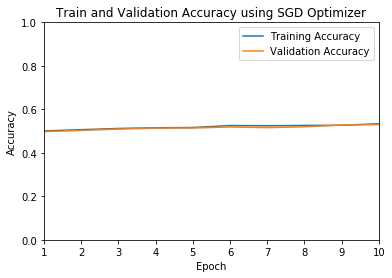

In [10]:
# Plot the validation accuracy for the model trained using the sgd optimizer:
from matplotlib import pyplot as plt

plt.plot(range(1,11), SGD_score.history['acc'], label='Training Accuracy')
plt.plot(range(1,11), SGD_score.history['val_acc'], 
         label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using SGD Optimizer')
plt.legend()
plt.show()

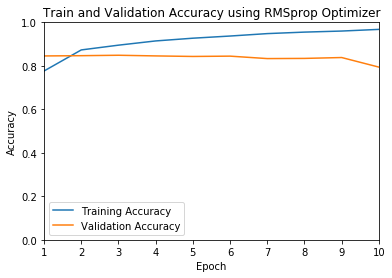

In [9]:
# Plot the validation accuracy for the model trained using the RMSprop optimizer:
plt.plot(range(1,11), RMSprop_score.history['acc'], 
         label='Training Accuracy')
plt.plot(range(1,11), RMSprop_score.history['val_acc'], 
         label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

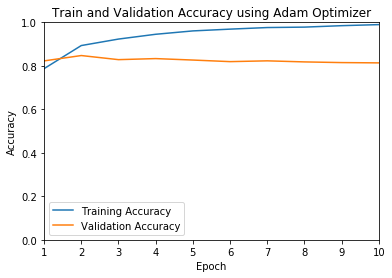

In [11]:
# Plot the validation accuracy for the model trained using the adam optimizer:
plt.plot(range(1,11), Adam_score.history['acc'], label='Training Accuracy')
plt.plot(range(1,11), Adam_score.history['val_acc'], 
         label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using Adam Optimizer')
plt.legend()
plt.show()

In [ ]:
# sgd optimizer - Training Accuracy is almost 50% % Validation Accuracy is around 50%
# adam optimizer - Training Accuracy is almost 100% % Validation Accuracy is around 80%. This gap of 20% suggests that overfitting is happening 
# RMSprop optimizer -  Training Accuracy is almost 95% % Validation Accuracy is around 85%
# RMSprop optimizer is the most optimal.

Text(56.406249999999986, 0.5, 'Actual')

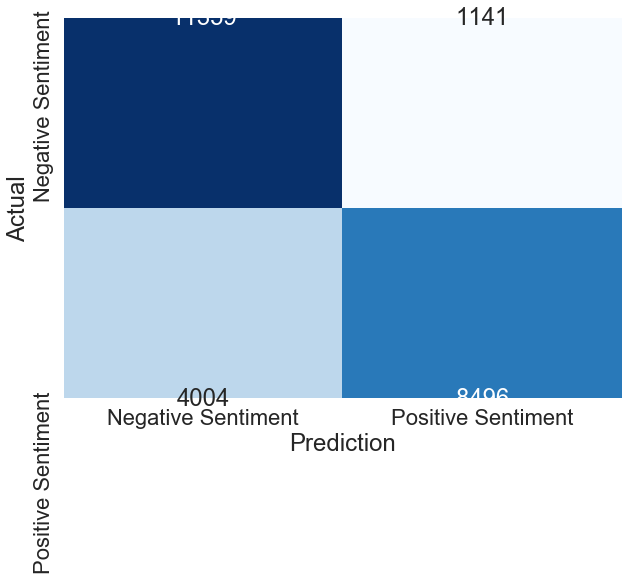

In [12]:
# ############ Confusion matrix ################
# True negative: The actual class is negative (negative sentiment), and the model also predicted negative
# False positive: The actual class is negative (negative sentiment), but the model predicted positive
# False negative: The actual class is positive (positive sentiment), but the model predicted negative
# True positive: The actual class is positive (positive sentiment), and the model predicted positive

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10,7))
sns.set(font_scale=2)
y_test_pred = RMSprop_model.predict_classes(X_test_padded)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Negative Sentiment', 
                 'Positive Sentiment'], yticklabels=['Negative Sentiment', 
                 'Positive Sentiment'], cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [13]:
false_negatives = []
false_positives = []

for i in range(len(y_test_pred)):
    if y_test_pred[i][0] != y_test[i]:
        if y_test[i] == 0: # False Positive
            false_positives.append(i)
        else:
            false_negatives.append(i)